## Observations and Insights 

In [126]:
%matplotlib notebook

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn import datasets
import numpy as np
from scipy.stats import linregress

In [128]:

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [129]:

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [130]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
extract_duplicates_values = combined_df.loc[combined_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
extract_duplicates_values

array(['g989'], dtype=object)

In [131]:
# Optional: Get all the data for the duplicate mouse ID. 
extract_duplicates = combined_df.loc[combined_df["Mouse ID"] == "g989"]
extract_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [132]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_df = combined_df[~combined_df["Mouse ID"].isin(extract_duplicates_df) == True]
final_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [133]:
final_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


## Summary Statistics

In [134]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.


In [135]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

summary_stat_table_v2 = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat_table_v2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [155]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using 
# pandas.

mice_barplot_group = final_df.groupby(['Timepoint'])
# mice_barplot_group = final_df.groupby(['Timepoint', 'xxxxx'])
mice_distribution = final_df['Drug Regimen'].value_counts().plot(kind='bar',
                                                             figsize=(14,8),
                                                            title="Number for mice per time point")
mice_distribution.set_xlabel("Test x axis")
mice_distribution.set_ylabel("Number of Mice")
plt.tight_layout()

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [156]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using 
# pyplot.



## Pie Plots

In [157]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


<IPython.core.display.Javascript object>


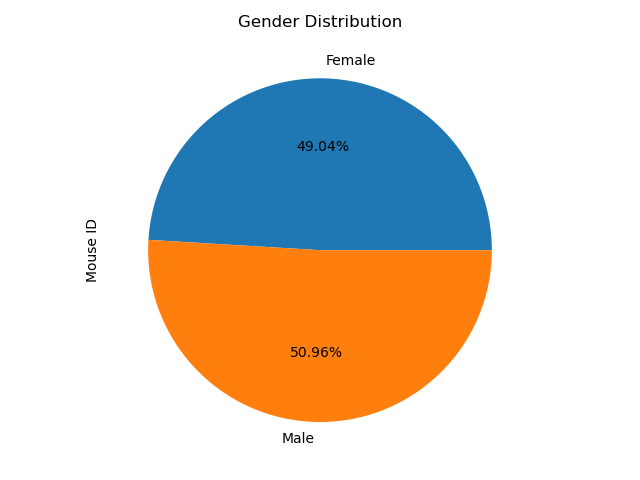

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_groups = final_df.groupby('Sex')
gender_distrubution_count = gender_groups['Mouse ID'].count()

gender_chart = gender_distrubution_count.plot(kind="pie",autopct="%.2f%%",title=("Gender Distribution"))
                                                                                 

plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [141]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [142]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [145]:
capomulin_df = final_df.loc[final_df['Drug Regimen']  == 'Capomulin']

In [146]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axis_values = capomulin_df['Timepoint']
y_axis_values = capomulin_df['Tumor Volume (mm3)']

plt.plot(x_axis_values, y_axis_values)


plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')

plt.show()

In [147]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

x_axis_values = capomulin_df['Weight (g)']
y_axis_values = capomulin_df['Tumor Volume (mm3)']

plt.scatter(x_axis_values,y_axis_values)

plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')

plt.show()


## Correlation and Regression

In [121]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr_reg_df = final_df.loc[final_df['Drug Regimen']  == 'Capomulin']

x_axis_values = corr_reg_df['Weight (g)']
y_axis_values = corr_reg_df['Tumor Volume (mm3)']

plt.scatter(x_axis_values,y_axis_values)

plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')

plt.show()

In [122]:
# Add the linear regression equation and line to plot
x_axis_values = corr_reg_df['Weight (g)']
y_axis_values = corr_reg_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_values, y_axis_values)
regress_values = x_axis_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()
